# How to use

This package use PyPlot to visualize figure and ImageMagick to make gif animation. If you haven't installed these packages, you have to do before using this package.

In [1]:
#Pkg.add("PyPlot")
#Pkg.clone("https://github.com/tkMeitner/Percolation.jl")
using Percolation, PyPlot

# Nearest Neighbor

First we make N by N lattice. Then we open each site with probability p and occupied with probability 1-p.

In [8]:
# N: lattice size
# p: occupied probability
N = 10; p = 0.6
square = squarenn(N, p)

Percolation.squarenn(10,0.6,[0 1 … 1 1; 0 1 … 1 0; … ; 0 0 … 1 1; 0 1 … 1 1],[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0])

To visualize initial condition, type following code.
The white, blue and red sites correspond to open, water and block sites, respectively.
We assume the top of this lattice contacts with water and it permeates the lattice gradually.
If a nearest neighbor site of a water site is open, the open site becomes water site.

We define "percolation" such that at least one path connected between top and bottom exists.
To check whether percolation occurs or not, use percolation function.
percolation function returns a value 0 or 1.
The first value represents if percolation occurs or not. 0 is not percolating and 1 is percolating.

In [9]:
percolation(square)

1

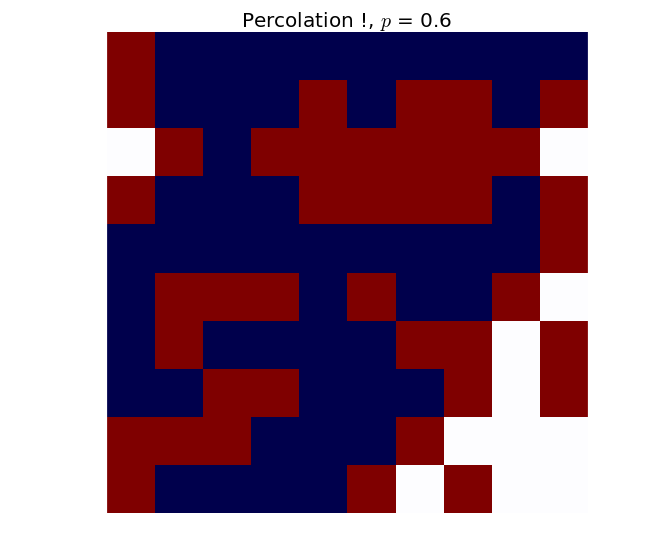

In [10]:
percolationplot(square)
# If you want to use other colormap, see http://matplotlib.org/examples/color/colormaps_reference.html

# Next nearest neighbor

If you want to simulate not only nearest neighbor but next nearest neighbor, use squarennn type.

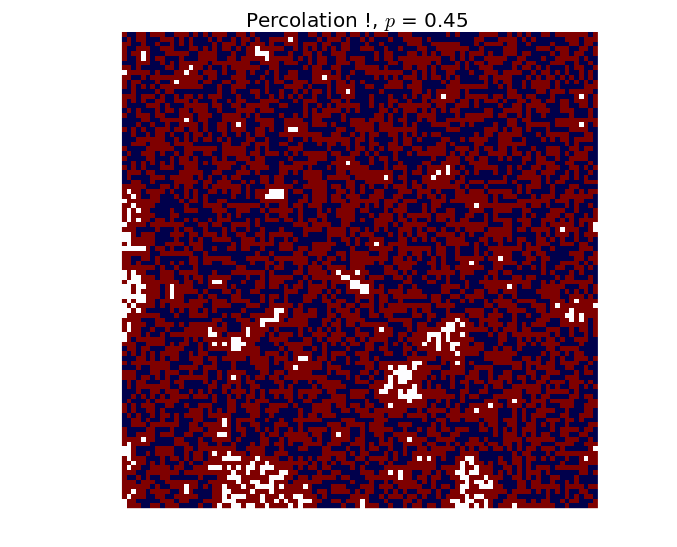

In [11]:
N = 100; p = 0.45
site = squarennn(N, p)
percolation(site)
percolationplot(site)

# GIF animation

To make gif animation, use percolationgif function.

In [ ]:
N = 20; p = 0.593;
site = squarenn(N, p) # or squarennn(N, p)
percolationgif(site)

# Triangular lattice

In [ ]:
N = 100; p = 0.5;
tri = trinn(N, p);
@time percolation(tri)
percolationplot(tri)

# Honeycomb lattice

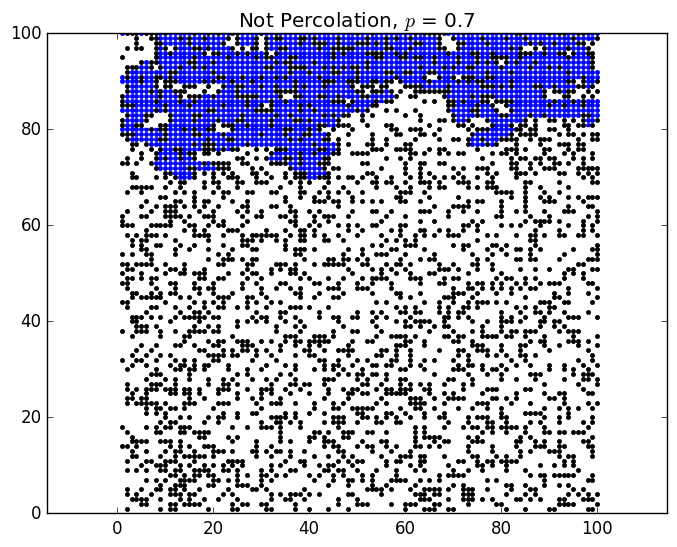

In [23]:
site = honeycomb(100, 0.7)
@time percolation(site)
percolationplot(site);

# Kagome lattice

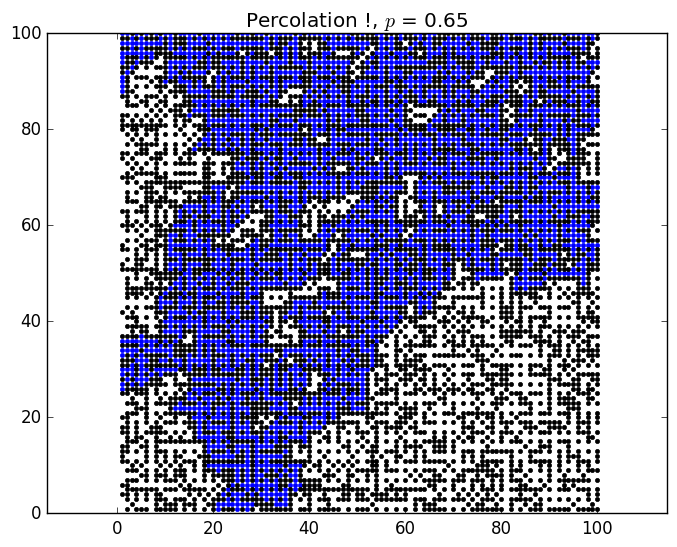

In [28]:
site = kagome(100, 0.65)
@time percolation(site)
percolationplot(site)

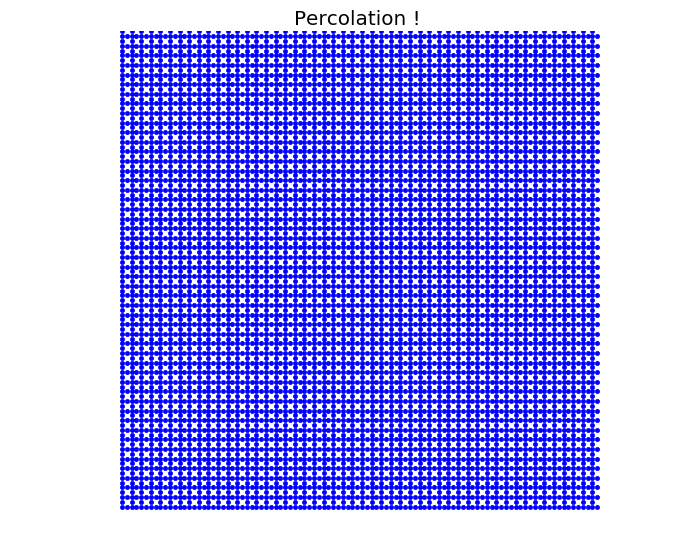

In [29]:
site = kagome(100, 1.0)
cluster(site)
clusterplot(site)

# d dimensional simple lattice

In [12]:
N = 100; dim = 3; p = 0.4;
simple = simplenn(N, dim, p);
@time percolation(simple)

 37.245616 seconds (61.88 M allocations: 1.940 GB, 1.69% gc time)


1

# Percolating probability

## square lattice, nearest neighbor

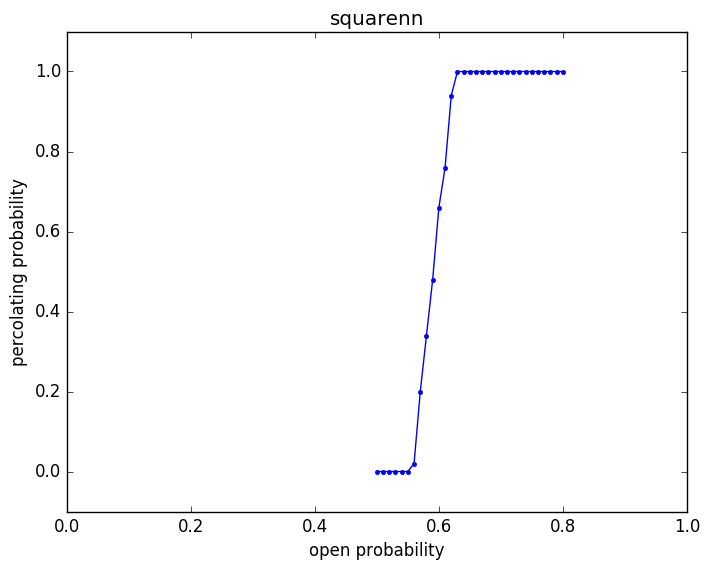

  5.455025 seconds (31.68 M allocations: 2.452 GB, 7.10% gc time)


In [31]:
plist = collect(0.5:0.01:0.8)
hit = zeros(Int64, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        square = squarenn(N, plist[i])
        hit[i] += percolation(square)
    end
end
hit /= trial;
plot(plist, hit, ".-");
title("squarenn")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

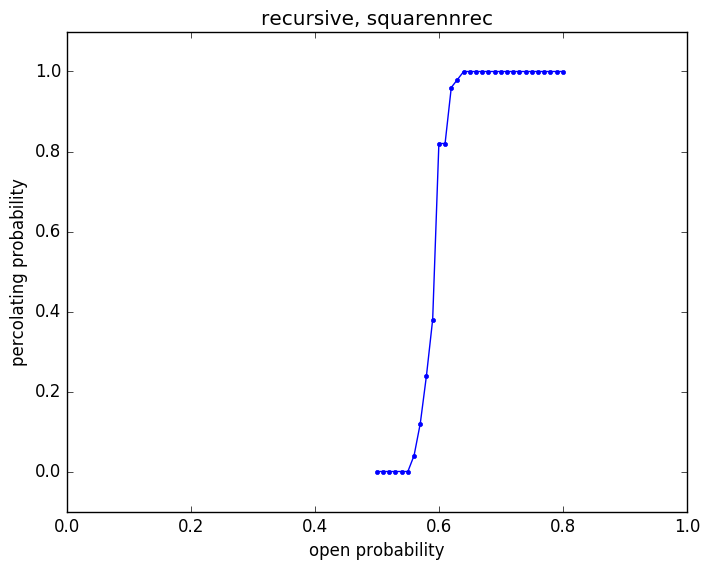

 16.842339 seconds (61.75 M allocations: 4.186 GB, 5.34% gc time)


In [32]:
plist = collect(0.5:0.01:0.8)
hit = zeros(Int64, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        square = squarennrec(N, plist[i])
        hit[i] += cluster(square)[1]
    end
end
hit /= trial;
plot(plist, hit, ".-");
title("recursive, squarennrec")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

## square lattice, next nearest neighbor

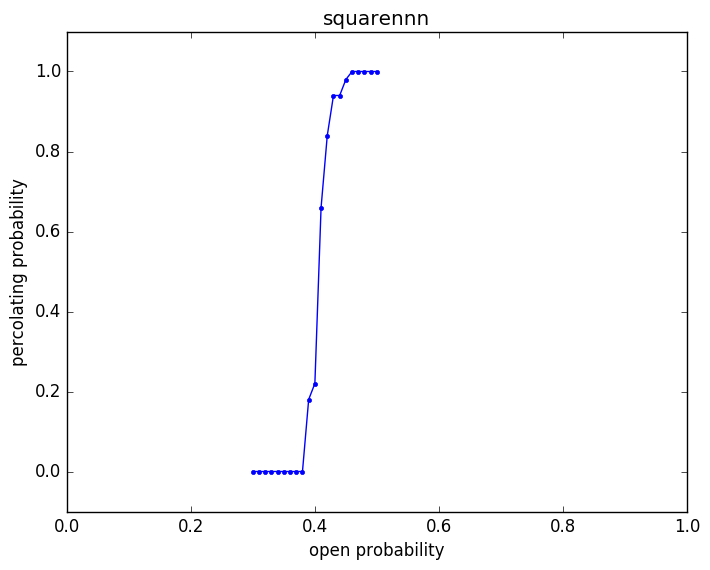

  2.767874 seconds (12.52 M allocations: 1.075 GB, 7.10% gc time)


In [33]:
plist = collect(0.3:0.01:0.5)
hit = zeros(Int64, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        square = squarennn(N, plist[i])
        hit[i] += percolation(square)
    end
end
hit /= trial;
plot(plist, hit, ".-");
title("squarennn")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

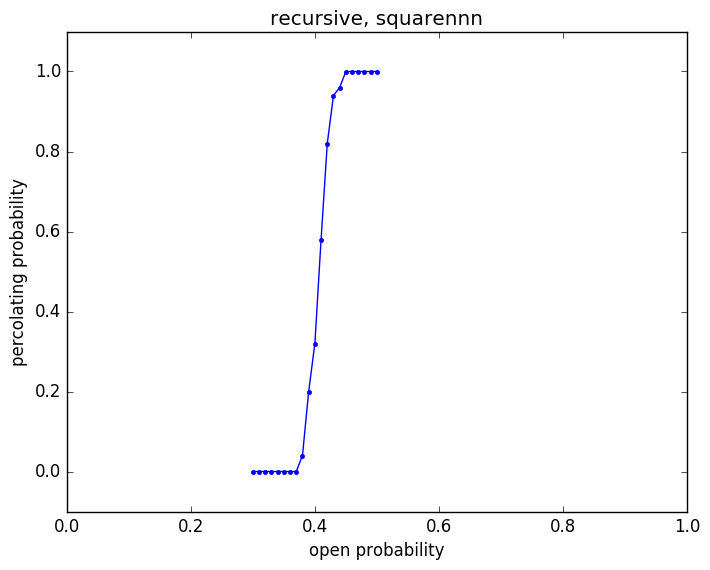

  2.681565 seconds (18.09 M allocations: 809.559 MB, 5.30% gc time)


In [4]:
plist = collect(0.3:0.01:0.5)
hit = zeros(Int64, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        square = squarennnrec(N, plist[i])
        hit[i] += percolation(square)
    end
end
hit /= trial;
plot(plist, hit, ".-");
title("recursive, squarennn")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

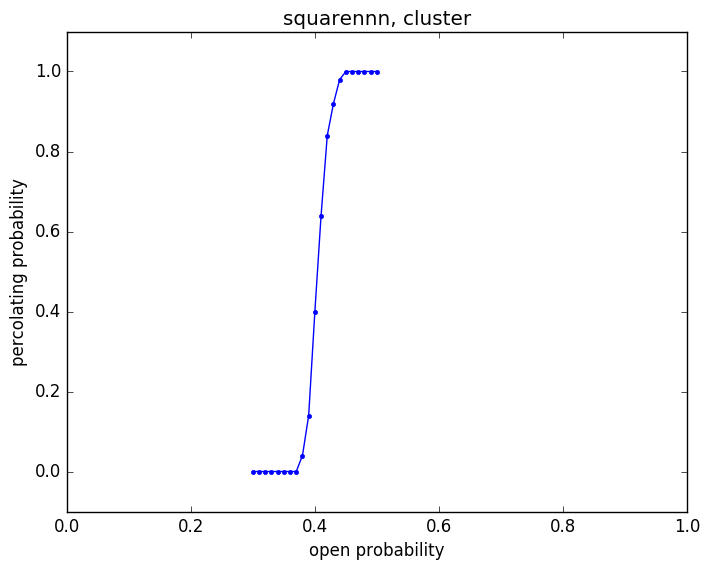

 42.402216 seconds (92.52 M allocations: 97.617 GB, 21.75% gc time)


In [34]:
plist = collect(0.30:0.01:0.5)
hit = zeros(Int64, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        square = squarennn(N, plist[i])
        hit[i] += cluster(square)[1]
    end
end
hit /= trial;
plot(plist, hit, ".-");
title("squarennn, cluster")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

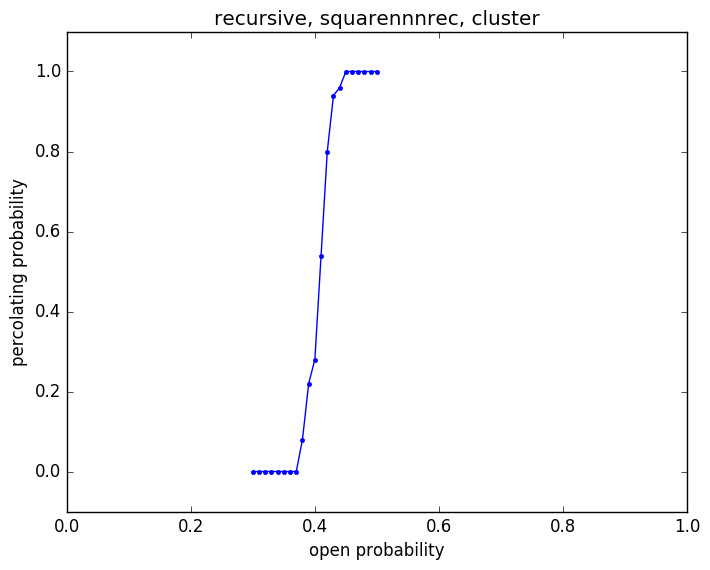

 11.234322 seconds (47.46 M allocations: 2.951 GB, 5.15% gc time)


In [35]:
plist = collect(0.30:0.01:0.5)
hit = zeros(Int64, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        square = squarennnrec(N, plist[i])
        hit[i] += cluster(square)[1]
    end
end
hit /= trial;
plot(plist, hit, ".-");
title("recursive, squarennnrec, cluster")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

## triangular lattice

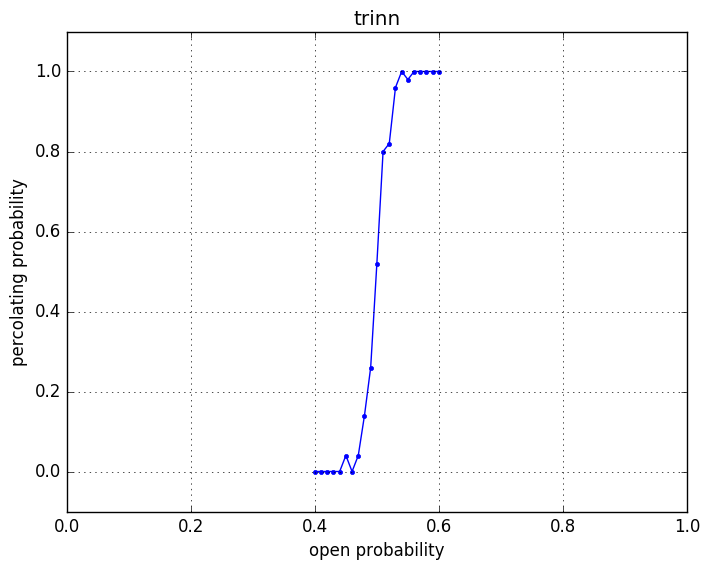

  4.184521 seconds (27.33 M allocations: 2.031 GB, 6.72% gc time)


In [36]:
plist = collect(0.4:0.01:0.6)
hit = zeros(Int64, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        square = trinn(N, plist[i])
        hit[i] += percolation(square)
    end
end
hit /= trial;
plot(plist, hit, ".-");
grid("on")
title("trinn")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

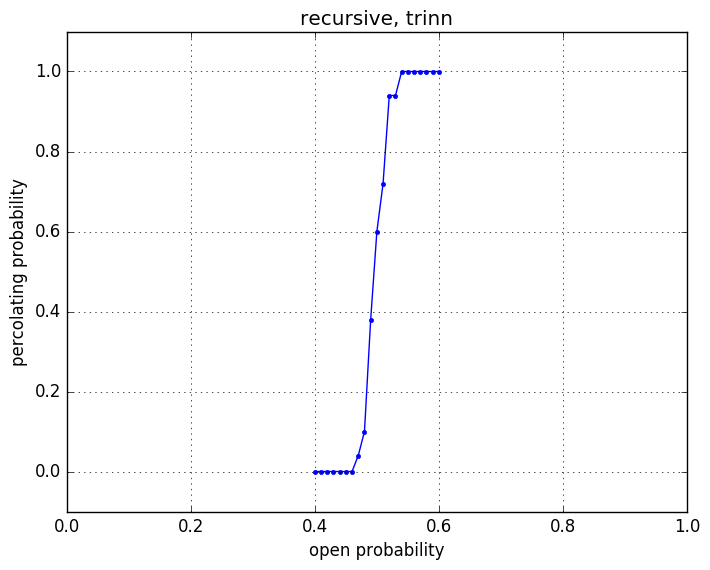

  2.688475 seconds (17.65 M allocations: 796.356 MB, 4.31% gc time)


In [5]:
plist = collect(0.4:0.01:0.6)
hit = zeros(Int64, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        square = trinnrec(N, plist[i])
        hit[i] += percolation(square)
    end
end
hit /= trial;
plot(plist, hit, ".-");
grid("on")
title("recursive, trinn")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

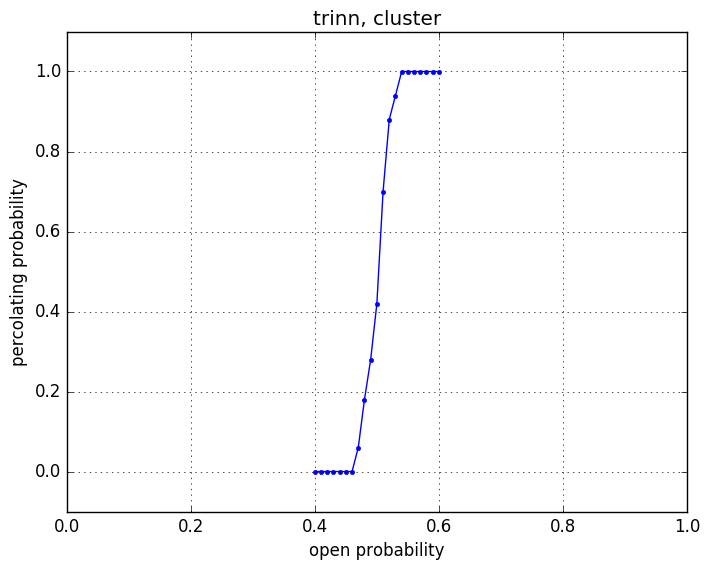

 55.575302 seconds (107.68 M allocations: 114.327 GB, 22.30% gc time)


In [37]:
plist = collect(0.4:0.01:0.6)
hit = zeros(Int64, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        square = trinn(N, plist[i])
        hit[i] += cluster(square)[1]
    end
end
hit /= trial;
plot(plist, hit, ".-");
grid("on")
title("trinn, cluster")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

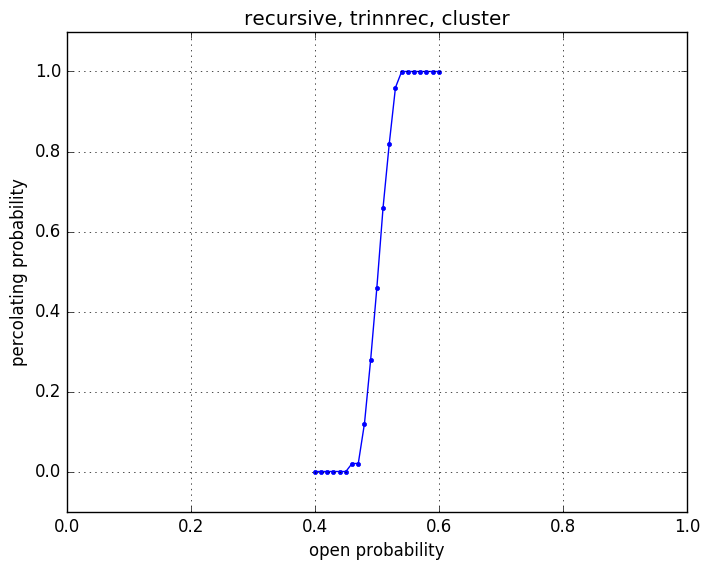

 12.358083 seconds (45.84 M allocations: 3.037 GB, 5.81% gc time)


In [38]:
plist = collect(0.4:0.01:0.6)
hit = zeros(Int64, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        square = trinnrec(N, plist[i])
        hit[i] += cluster(square)[1]
    end
end
hit /= trial;
plot(plist, hit, ".-");
grid("on")
title("recursive, trinnrec, cluster")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

## simple lattice

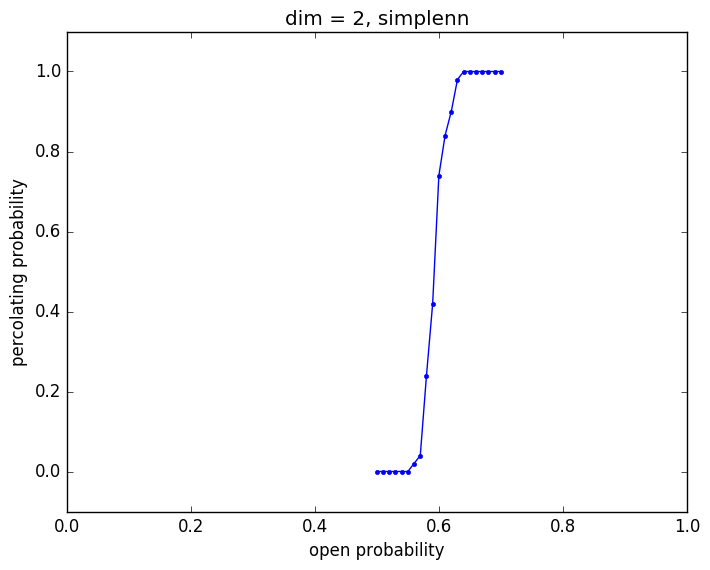

157.015478 seconds (327.86 M allocations: 10.695 GB, 1.88% gc time)


In [7]:
plist = collect(0.5:0.01:0.7)
hit = zeros(Int64, length(plist))
N = 100; trial = 50; dim = 2
@time for i in 1:length(plist)
    for itr in 1:trial
        square = simplenn(N, dim, plist[i])
        hit[i] += percolation(square)
    end
end
hit /= trial;
plot(plist, hit, ".-");
title("dim = $dim, simplenn")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

In [ ]:
plist = collect(0.2:0.05:0.4)
hit = zeros(Int64, length(plist))
N = 20; trial = 30; dim = 3
@time for i in 1:length(plist)
    for itr in 1:trial
        square = simplenn(N, dim, plist[i])
        hit[i] += cluster(square)[1]
    end
end
hit /= trial;
plot(plist, hit, ".-");
title("dim = $dim, simplenn")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

## honeycomb lattice

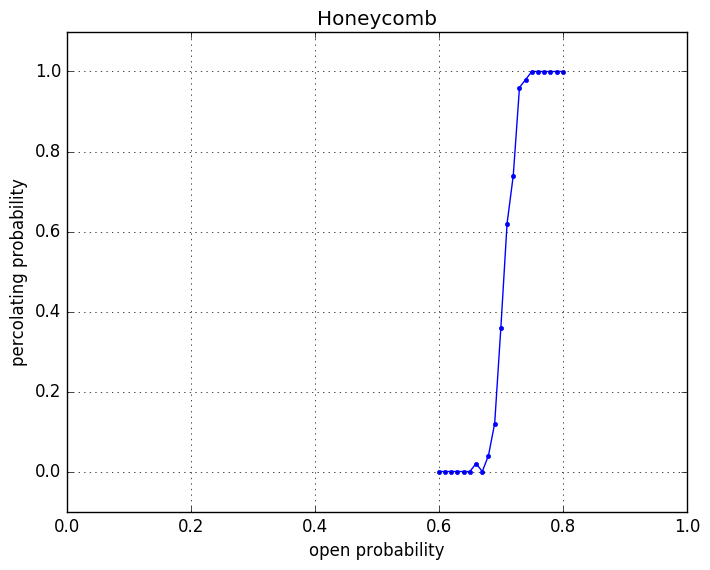

  9.466363 seconds (25.50 M allocations: 16.302 GB, 20.86% gc time)


In [18]:
plist = collect(0.6:0.01:0.8)
hit = zeros(Int, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        site = honeycomb(N, plist[i])
        hit[i] += percolation(site)
    end
end
hit /= trial;
plot(plist, hit, ".-");
grid("on")
title("Honeycomb")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

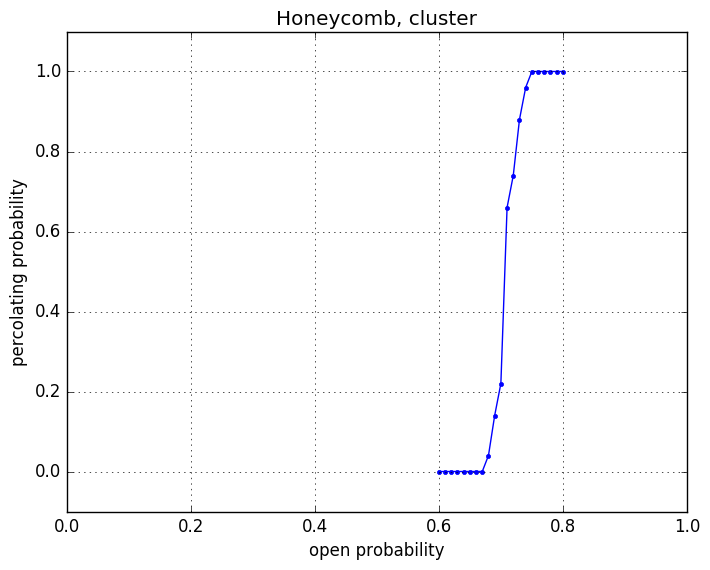

 46.822272 seconds (109.52 M allocations: 71.942 GB, 20.94% gc time)


In [39]:
plist = collect(0.6:0.01:0.8)
hit = zeros(Int, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        site = honeycomb(N, plist[i])
        hit[i] += cluster(site)[1] * 1
    end
end
hit /= trial;
plot(plist, hit, ".-");
grid("on")
title("Honeycomb, cluster")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

## Kagome lattice

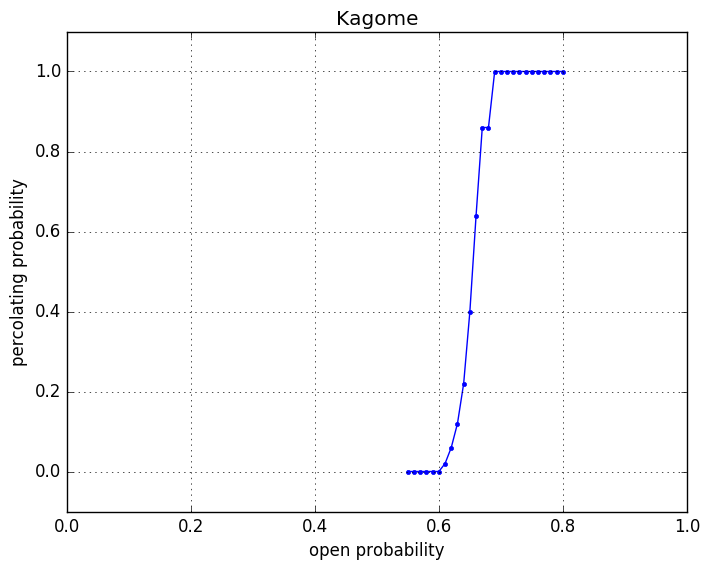

 16.971654 seconds (34.34 M allocations: 31.027 GB, 22.30% gc time)


In [9]:
plist = collect(0.55:0.01:0.8)
#plist = collect(0.0:0.1:1)
hit = zeros(Int, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        site = kagome(N, plist[i])
        hit[i] += percolation(site)
    end
end
hit /= trial;
plot(plist, hit, ".-");
title("Kagome")
grid("on")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

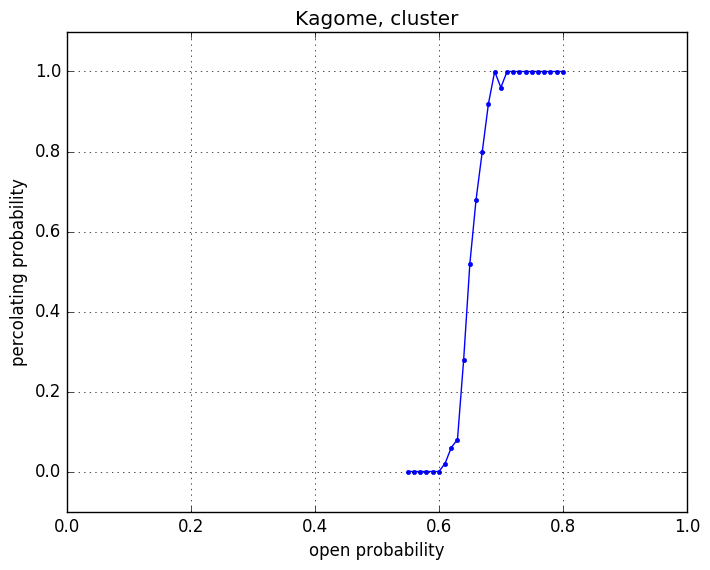

 62.812561 seconds (120.30 M allocations: 122.889 GB, 23.23% gc time)


In [40]:
plist = collect(0.55:0.01:0.8)
#plist = collect(0.0:0.1:1)
hit = zeros(Int, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        site = kagome(N, plist[i])
        hit[i] += cluster(site)[1] * 1
    end
end
hit /= trial;
plot(plist, hit, ".-");
title("Kagome, cluster")
grid("on")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

# Clustering

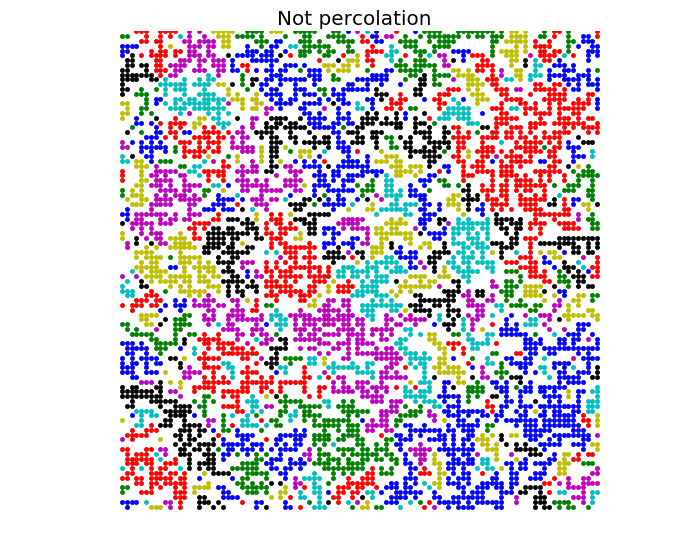

In [18]:
site = squarennrec(100, 0.5); cluster(site); clusterplot(site);

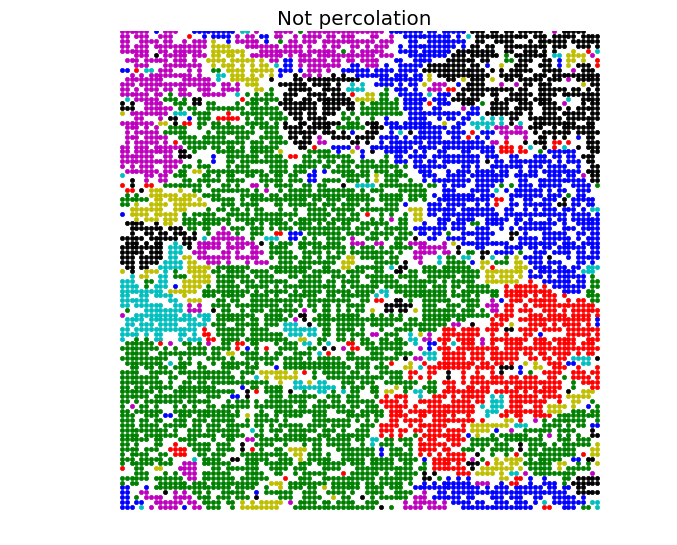

In [19]:
site = honeycomb(100, 0.7); cluster(site); clusterplot(site);